# Lesson 6: Lithion Power - Clustering Drivers (Case Study)

# Import Libraries

**Import the usual libraries **

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)

# Data Set : Vehicle/Driver Data

For the sake of simplicity, you will take only two features : mean distance driven per day and the mean percentage of time a driver was >5 mph over the speed limit. 

Here are what the data represent:
* id: Unique Id of the driver .
* mean_dist_day: Mean distance driven by driver per day
* mean_over_speed_perc: Mean percentage of time a driver was > 5 mph over the speed limit

## Get the Data

** Use pandas to read driver-data.csv as a dataframe called df.**

In [3]:
df=pd.read_csv('driver-data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [5]:
# Check the no. of records -- It should be 4000
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [6]:
# Check the Basic Distribution of Data
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


Run the algorithm with K=2, which is the minimum number of clusters that can exist in a dataset.

In [7]:
# Using the KMeans from sklearn
from sklearn.cluster import KMeans

** Create an instance of a k-means model with 2 clusters.**

In [8]:
kmeans = KMeans(n_clusters=2)
df_analyze = df.drop('id',axis=1)

**Fit the model to all the data, except for the id label.**

In [9]:
kmeans.fit(df_analyze)

KMeans(n_clusters=2)

** Q1. What are the cluster center vectors?**

In [10]:
kmeans.cluster_centers_

array([[180.017075  ,  18.29      ],
       [ 50.04763438,   8.82875   ]])

** Check the lables of data point
<br>Check the size of labels : should match dataset count 
   **
   <br>The cluster labels are returned in `kmeans.labels_`. 

In [11]:
print (kmeans.labels_)
print (len(kmeans.labels_))

[1 1 1 ... 0 0 0]
4000


** Q2. How many drivers are there in 1st and 2nd Cluster?**

In [12]:
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 800, 1: 3200}


** Plot the Cluster Data <br> Q3. What is the inference you can draw from the clustering? **

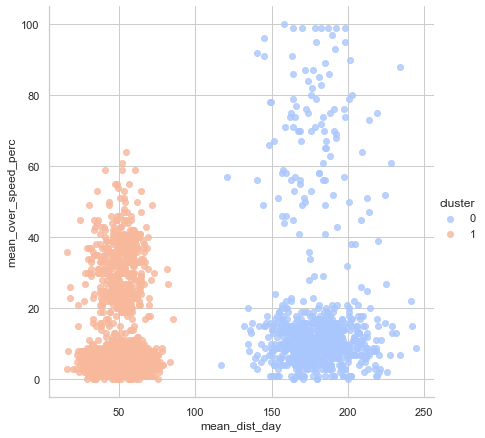

In [13]:
# plot the data 
df_analyze['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze, hue='cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

Now, cluster  the data in 4 groups and answer the same questions as for 2 groups
<br>** Q4. What are the cluster center vectors?
<br> Q5. How many drivers are there in each of 4 Cluster?**


In [14]:
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(df.drop('id',axis=1))
kmeans_4.fit(df.drop('id',axis=1))
print(kmeans_4.cluster_centers_)	
unique, counts = np.unique(kmeans_4.labels_, return_counts=True)

kmeans_4.cluster_centers_
print(dict(zip(unique, counts)))

[[180.34311782  10.52011494]
 [ 49.9799964    5.22434282]
 [177.83509615  70.28846154]
 [ 50.49167849  32.49172577]]
{0: 696, 1: 2775, 2: 104, 3: 425}


** Plot the Cluster Data <br> Q6. What is the inference you can draw from the clustering? **


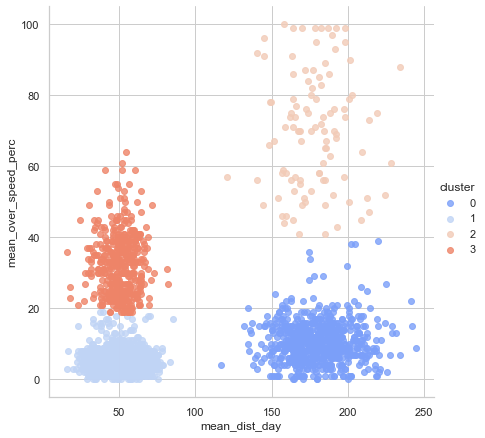

In [15]:
# plot the data 
df_analyze['cluster'] = kmeans_4.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze, hue='cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

# End